# EDA on Top Spotify songs from 2010-2019

![](https://cache.cracked.to/64a8d274ca28bad25eef1ead0613480cd95f1bda/68747470733a2f2f69302e77702e636f6d2f74656368747269636b73656f2e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031392f30362f736f757263652e6769663f726573697a653d33353025324332303026616d703b73736c3d31)

#### If you're a music nerd like me, then you will be excited by seeing these cool insights from Top songs on Spotify from 2010-2019.

#### Let's have a look into some of the cool insights we get at the end of this notebook:
* **Katy Perry** has most number of top songs on Spotify in the period of 2010-19.
* Rihanna's **FourFiveSeconds** is the song with highest beats per minute.
* Most of the popular songs are with duration less than 4 minutes(250 seconds).
* The most popular hip hop song on Spotify during 2010-19 was Eminem's **"Love the way you lie"**.

### To know more insights, Follow till the [end](#list) and enjoy this notebook.

### About the dataset:

*    Genre - the genre of the track
*     Year - the release year of the recording. 
*     Added - the earliest date you added the track to your collection.
*     Beats Per Minute (BPM) - The tempo of the song.
*     Energy - The energy of a song - the higher the value, the more energtic. song
*     Danceability - The higher the value, the easier it is to dance to this song.
*     Loudness (dB) - The higher the value, the louder the song.
*     Liveness - The higher the value, the more likely the song is a live recording.
*     Valence - The higher the value, the more positive mood for the song.
*     Length - The duration of the song.
*     Acousticness - The higher the value the more acoustic the song is.
*     Speechiness - The higher the value the more spoken word the song contains.
*     Popularity - The higher the value the more popular the song is.
*     Duration - The length of the song. 

#### Import libraries, load the data and get the first look

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='dark')
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_csv("/kaggle/input/top-spotify-songs-from-20102019-by-year/top10s.csv", encoding='ISO-8859-1')

data.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [2]:
# dropping the 'Unnamed: 0' column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [5]:
# seeing if there are any missing values
data.isna().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

No need to worry much as there are no missing values in the data

Since the column names are very strange, let's change them

In [6]:
data.rename(columns={'title':'song', 'artist':'artist', 'top genre':'genre', 'year':'year', 'bpm':'beats_per_minute','nrgy':'energy',
                    'dnce':'danceability','dB':'loudness','live':'liveness', 'val':'valence', 'dur':'length', 'acous':'acousticness',
                    'spch':'speechiness','pop':'popularity'}, inplace=True)

In [7]:
data.columns

Index(['song', 'artist', 'genre', 'year', 'beats_per_minute', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [8]:
data.describe()

,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


# Exploratory Data Analysis

#### Let's have a look into genres present in the dataset

In [9]:
data['genre'].nunique()

50

In [10]:
data['genre'].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
Name: genre, dtype: int64

Text(0.5, 1.0, 'Top 10 genre in percentage')

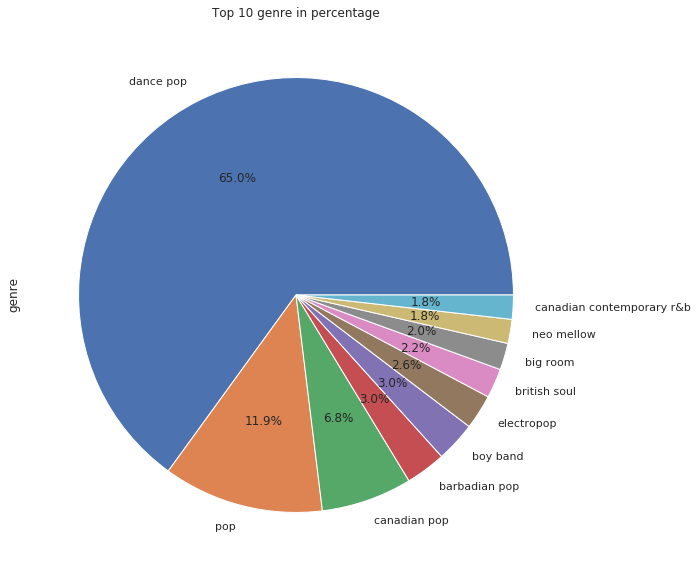

In [11]:

data['genre'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 genre in percentage')

* There are 50 unique genres in the top spotify songs from 2010-19
* During this timeperiod, most of the top songs belongs to the **pop** genre
* And in particular, dance-pop is the top genre on Spotify during this period.

#### Let's have a look into artists present in the dataset

In [12]:
data['artist'].nunique()

184

In [13]:
data['artist'].value_counts().head(10)

Katy Perry          17
Justin Bieber       16
Maroon 5            15
Rihanna             15
Lady Gaga           14
Bruno Mars          13
Ed Sheeran          11
Pitbull             11
Shawn Mendes        11
The Chainsmokers    11
Name: artist, dtype: int64

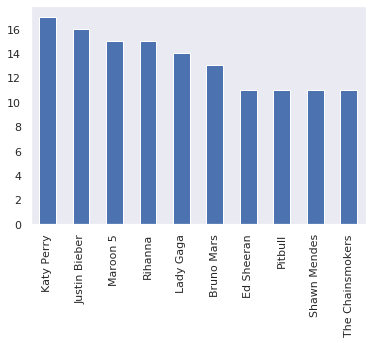

In [14]:
data['artist'].value_counts().head(10).plot.bar()

* There are 184 unique artists whose songs reached top in the charts on Spotify in the timeperiod of 2010-19.
* **Katy Perry** has most number of top songs on Spotify in the period of 2010-19 followed by **Justin Bieber** .

#### Let's have a look into the distirbution of all the features

Text(0.5, 1, '[popularity]')

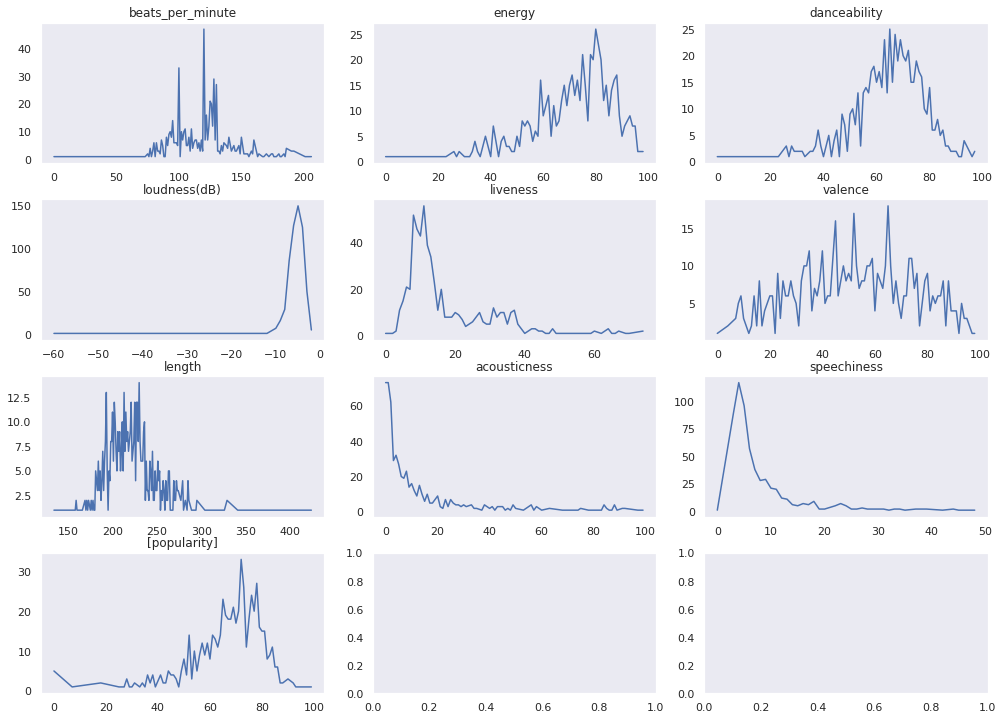

In [15]:
# line plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,10))
plt.tight_layout()
axes[0][0].plot(data['beats_per_minute'].value_counts().sort_index())
axes[0][0].set_title('beats_per_minute')
axes[0][1].plot(data['energy'].value_counts().sort_index())
axes[0][1].set_title('energy')
axes[0][2].plot(data['danceability'].value_counts().sort_index())
axes[0][2].set_title('danceability')
axes[1][0].plot(data['loudness'].value_counts().sort_index())
axes[1][0].set_title('loudness(dB)')
axes[1][1].plot(data['liveness'].value_counts().sort_index())
axes[1][1].set_title('liveness')
axes[1][2].plot(data['valence'].value_counts().sort_index())
axes[1][2].set_title('valence')
axes[2][0].plot(data['length'].value_counts().sort_index())
axes[2][0].set_title('length')
axes[2][1].plot(data['acousticness'].value_counts().sort_index())
axes[2][1].set_title('acousticness')
axes[2][2].plot(data['speechiness'].value_counts().sort_index())
axes[2][2].set_title('speechiness')
axes[3][0].plot(data['popularity'].value_counts().sort_index())
axes[3][0].set_title('[popularity]')

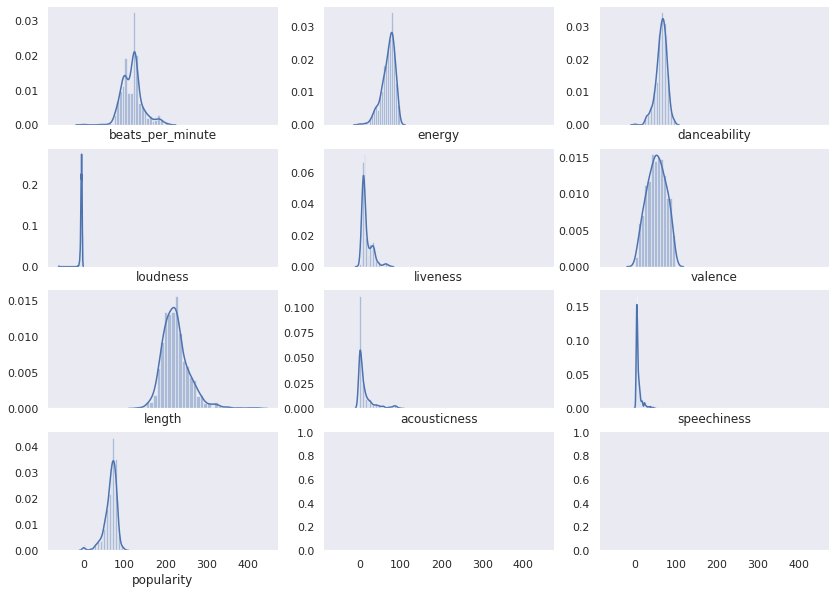

In [16]:
# distplots
f, axes = plt.subplots(4, 3, figsize=(14, 10), sharex=True)
sns.despine(left=True)
sns.distplot(data.beats_per_minute, color="b", ax=axes[0, 0])
sns.distplot(data.energy,color="b", ax=axes[0, 1])
sns.distplot(data.danceability, color="b", ax=axes[0, 2])
sns.distplot(data.loudness, color="b", ax=axes[1, 0])
sns.distplot(data.liveness, color="b", ax=axes[1, 1])
sns.distplot(data.valence, color="b", ax=axes[1, 2])
sns.distplot(data.length, color="b", ax=axes[2, 0])
sns.distplot(data.acousticness, color="b", ax=axes[2, 1])
sns.distplot(data.speechiness, color="b", ax=axes[2, 2])
sns.distplot(data.popularity, color="b", ax=axes[3, 0])

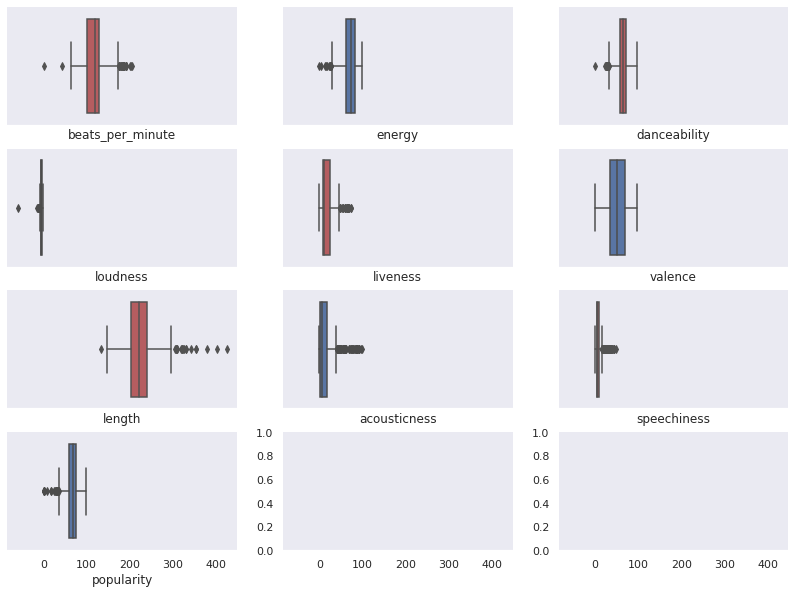

In [17]:
# boxplots
f, axes = plt.subplots(4, 3, figsize=(14, 10), sharex=True)
sns.despine(left=True)
sns.boxplot(data.beats_per_minute, color="r", ax=axes[0, 0])
sns.boxplot(data.energy,color="b", ax=axes[0, 1])
sns.boxplot(data.danceability, color="r", ax=axes[0, 2])
sns.boxplot(data.loudness, color="b", ax=axes[1, 0])
sns.boxplot(data.liveness, color="r", ax=axes[1, 1])
sns.boxplot(data.valence, color="b", ax=axes[1, 2])
sns.boxplot(data.length, color="r", ax=axes[2, 0])
sns.boxplot(data.acousticness, color="b", ax=axes[2, 1])
sns.boxplot(data.speechiness, color="r", ax=axes[2, 2])
sns.boxplot(data.popularity, color="b", ax=axes[3, 0])

#### Let's have a clear look into the feature **beats_per_minute** 

In [18]:
data.beats_per_minute.describe()

count    603.000000
mean     118.545605
std       24.795358
min        0.000000
25%      100.000000
50%      120.000000
75%      129.000000
max      206.000000
Name: beats_per_minute, dtype: float64

In [19]:
def grouping(x):
  if x <= 100:
    return '<100'
  elif x <= 150:
    return '101-150'
  elif x <= 200:
    return '151-200'
  else:
    return '>200'

groups = data.beats_per_minute.apply(grouping)
values = groups.value_counts()
labels = values.index
fig = px.pie(data, values=values, names=labels)
fig.update_layout(
    title="bpm distirbution")
fig.show()

#### Insights:
* #### Most of the top songs are having 100-150 beats per minute(bpm)
* #### Very few songs are having bpm > 200 
* #### Only 3 songs are having bpm > 200 (you can see the value if you hover the pie chart above)
* #### Just out of curiosity, Let's see what are those 3 songs with bpm>200

In [20]:
data[data['beats_per_minute']>200]

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013,201,95,36,-3,37,51,211,9,48,50
276,FourFiveSeconds,Rihanna,barbadian pop,2015,206,27,58,-6,13,35,188,88,5,80
362,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0


In [21]:
fig = px.scatter(data[data['beats_per_minute']>200], y="beats_per_minute", x="popularity", hover_name='song', color='beats_per_minute', size='acousticness')
fig.show()

#### Insights:
*  If you hover over the yellow dot in top-right corner, you can see that Rihanna's **FourFiveSeconds** is the song with highest bpm and also it has the highest popularity among the other 3.
*  If you dont know, bpm is very high, because this song was produced by **Kanye West** who is very talented in recording and producing music. The lyrics for this song was written by **Paul McCartney** which is why this song also gained very popularity.

### Let's look into some good features, year wise

#### 1. Danceability

In [22]:
fig = px.violin(data, y="danceability", color="year", points='all', hover_name='song', hover_data=['artist'])
fig.show()

#### Insights:
* If you have a clear look, the two songs which are easier to dance are of two female hiphop artists, **Nicki Minaj** and **CardiB**.
* CardiB's **"Drip"** released in 2018 is the song with highest danceability followed by Nicki Minaj's **"Anaconda"** in 2014.
* Imagine Dragon's **"Bad Liar"** ia also the song with danceability equal to Drip, thus there are two songs with highest danceablity.

#### 2. Popularity

In [23]:
fig = px.violin(data, y="popularity", color="year", points='all', hover_name='song', hover_data=['artist'])
fig.show()

#### Insights:
* It is very clear that Maroon5's **"Memories"** is the most popular song during the period of 2010-19.

#### 3. Energy

In [24]:
fig = px.violin(data, y="energy", color="year", points='all', hover_name='song', hover_data=['artist'])
fig.show()

#### Insights:
* The most energetic song during this period is **"Hello"** by French DJ, Martin Solveig

### Let's look into the relationships between different variables

In [25]:
fig = px.scatter(data, x="danceability", y="energy", color='energy', hover_name='song', hover_data=['artist','year'])
fig.show()

#### Insights:
* Danceability increases as energy increases.
* **"Pom Poms"** by Jonas Brothers is the song with highest energy among the top songs during this period.
* Even though the energy is less than half of the top songs, **Bad Liar** by Imagine Dragons is the song with highest danceability during 2010-19.

In [26]:
fig = px.scatter(data, x="popularity", y="length", color='length', hover_name='song', hover_data=['artist','year'])
fig.show()

#### Insights:
* It is very clear that most of the popular songs are with duration less than 4 minutes(250 seconds)
* The song with highest duration is **"TKO"** by Justin Timberlake which is 7 minutes(424 seconds)
* The song with least duration is **"Mark my words"** by Justin Bieber which is just 2.2 minutes(134 seconds)

In [27]:
fig = px.scatter(data, x="popularity", y="speechiness", color='year', hover_name='song', hover_data=['artist','year'])
fig.show()

#### Insights:
* The most popular songs contain less spoken words
* The song with more spoken words is **"How ya doin'?"** by Little Mix feauturing Missy Elliot.

### Let's get some insights from the most recent year 2019

In [28]:
fig = px.scatter(data.query("year==2019"), y="popularity", x="artist", hover_name='song', color='popularity') 
fig.show()

#### Insights:
* Maroon5's **"Memories"** is the most popular song in 2019.
* EdSheeran has 5 top songs in 2019.

#### Let's see how many hip hop songs songs are present

In [29]:
data[data['genre'].str.contains('hip hop')]

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
15,OMG (feat. will.i.am),Usher,atl hip hop,2010,130,75,78,-6,36,33,269,20,3,72
47,DJ Got Us Fallin' In Love (feat. Pitbull),Usher,atl hip hop,2010,120,86,66,-3,8,65,221,3,11,52
48,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2010,80,86,45,-5,26,58,329,7,39,49
95,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2011,80,86,45,-5,26,58,329,7,39,49
158,"Hold On, We're Going Home",Drake,canadian hip hop,2013,100,41,77,-7,7,29,228,0,10,73
209,Freak,Kelly Rowland,atl hip hop,2013,104,78,65,-5,12,45,274,13,6,28
230,Fancy,Iggy Azalea,australian hip hop,2014,95,72,91,-4,5,38,200,9,7,70
339,See You Again (feat. Charlie Puth),Wiz Khalifa,hip hop,2015,80,48,69,-8,6,28,230,37,8,56
379,"Me, Myself & I",G-Eazy,hip hop,2016,112,67,76,-7,16,38,251,2,10,78


* My bad, only 14 hiphop songs :(

In [30]:
fig = px.scatter(data[data['genre'].str.contains('hip hop')], x="artist", y="popularity", hover_name='song')
fig.show()

* The most popular hip hop song on Spotify during 2010-19 was Eminem's **"Love the way you lie"**.

### Let's get some insights from a particular artist

#### Since EMINEM is my favorite, I want to analyse his songs.

In [31]:
em = data[data['artist']=='Eminem']
em

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
559,Walk On Water (feat. Beyoncé),Eminem,detroit hip hop,2018,82,44,48,-10,64,62,304,81,24,65


Oh, this is very disappointing decade for EMINEM, and also point to note - Pop listeners are more than hip hop listeners.

So, let me take any Pop artist to analyse!!!!

In [32]:
data['artist'].value_counts().head(10)

Katy Perry          17
Justin Bieber       16
Maroon 5            15
Rihanna             15
Lady Gaga           14
Bruno Mars          13
Ed Sheeran          11
Pitbull             11
Shawn Mendes        11
The Chainsmokers    11
Name: artist, dtype: int64

#### I am taking justin bieber

In [33]:
jb = data[data['artist']=='Justin Bieber']
jb

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
120,Beauty And A Beat,Justin Bieber,canadian pop,2012,128,84,60,-5,7,53,228,0,6,72
123,Boyfriend,Justin Bieber,canadian pop,2012,97,55,72,-6,13,33,171,4,5,71
182,Heartbreaker,Justin Bieber,canadian pop,2013,105,52,56,-7,34,58,263,14,10,61
271,Love Yourself,Justin Bieber,canadian pop,2015,100,38,61,-10,28,52,234,84,44,83
275,Sorry,Justin Bieber,canadian pop,2015,100,76,65,-4,30,41,201,8,5,81
279,What Do You Mean?,Justin Bieber,canadian pop,2015,125,57,85,-8,8,79,206,59,10,79
301,Company,Justin Bieber,canadian pop,2015,95,80,59,-5,8,43,208,13,6,72
314,I'll Show You,Justin Bieber,canadian pop,2015,192,61,36,-7,18,8,200,5,10,68
319,The Feeling,Justin Bieber,canadian pop,2015,127,81,53,-6,10,21,245,8,6,67


In [34]:
data[data['artist']=='Justin Bieber']['year'].value_counts()

2015    9
2012    2
2016    2
2013    1
2010    1
2018    1
Name: year, dtype: int64

#### Let's see the number of Lady Gaga's songs in each year

In [35]:
data[data['artist']=='Lady Gaga']['year'].value_counts()

2011    5
2010    3
2016    2
2014    1
2013    1
2018    1
2017    1
Name: year, dtype: int64

In [36]:
fig = px.scatter(data[data['artist']=='Justin Bieber'], x="popularity", y="year", hover_name='song', hover_data=['artist','year'])
fig.show()

* It seems that 2015 is very lucky for Justin Bieber as he had 9 top singles.
* **"Friends"** is most popular song.

### Let's look into top songs based on different features

#### Top 10 songs based on acousticness

In [37]:
data.sort_values(by='acousticness',ascending=False).head(10)[['song','artist','year','acousticness']]

,song,artist,year,acousticness
431,Start,John Legend,2016,99
255,Not About Angels,Birdy,2014,97
186,Clown,Emeli Sandé,2013,92
210,All of Me,John Legend,2014,92
96,Turning Page,Sleeping At Last,2011,91
436,Beautiful Birds (feat. Birdy),Passenger,2016,91
52,Someone Like You,Adele,2011,89
330,Mark My Words,Justin Bieber,2015,88
276,FourFiveSeconds,Rihanna,2015,88
398,All I Ask,Adele,2016,88


#### Top 10 songs based on how likely the song is a live recording

In [38]:
data.sort_values(by='liveness',ascending=False).head(10)[['song','artist','year','liveness']]

,song,artist,year,liveness
400,NO,Meghan Trainor,2016,74
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,2019,74
12,Cooler Than Me - Single Mix,Mike Posner,2010,70
354,Time of Our Lives,Pitbull,2015,69
63,Monster,Kanye West,2011,67
101,Last Friday Night (T.G.I.F.),Katy Perry,2011,67
175,Play Hard (feat. Ne-Yo & Akon) - New Edit,David Guetta,2013,66
42,Hard,Rihanna,2010,65
292,Don't,Ed Sheeran,2015,64
559,Walk On Water (feat. Beyoncé),Eminem,2018,64


#### Top 10 songs based on the number of songs it contains

In [39]:
data.sort_values(by='speechiness',ascending=False).head(10)[['song','artist','year','speechiness']]

,song,artist,year,speechiness
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,2013,48
14,Like A G6,Far East Movement,2010,45
364,Love Yourself,Justin Bieber,2016,44
271,Love Yourself,Justin Bieber,2015,44
266,I Luh Ya Papi,Jennifer Lopez,2014,42
48,Castle Walls (feat. Christina Aguilera),T.I.,2010,39
95,Castle Walls (feat. Christina Aguilera),T.I.,2011,39
465,Crying in the Club,Camila Cabello,2017,38
100,Moment 4 Life - Album Version (Edited),Nicki Minaj,2011,38
542,Chun-Li,Nicki Minaj,2018,37


#### Top 10 songs based on loudness

In [40]:
data.sort_values(by='loudness',ascending=False).head(10)[['song','artist','year','loudness']]

,song,artist,year,loudness
108,What Makes You Beautiful,One Direction,2012,-2
198,Pom Poms,Jonas Brothers,2013,-2
116,Starships,Nicki Minaj,2012,-2
498,Rich Boy,Galantis,2017,-2
30,3,Britney Spears,2010,-2
154,Clarity,Zedd,2013,-3
508,One Kiss (with Dua Lipa),Calvin Harris,2018,-3
427,True Colors,Zedd,2016,-3
146,Don't You Worry Child - Radio Edit,Swedish House Mafia,2013,-3
418,WTF (Where They From),Missy Elliott,2016,-3


* The third one is **"Starships"** by Nicki Minaj ❤

#### And finally based on Popularity

In [41]:
data.sort_values(by='popularity',ascending=False).head(10)[['song','artist','year','popularity']]

,song,artist,year,popularity
572,Memories,Maroon 5,2019,99
573,Lose You To Love Me,Selena Gomez,2019,97
574,Someone You Loved,Lewis Capaldi,2019,96
575,Señorita,Shawn Mendes,2019,95
576,How Do You Sleep?,Sam Smith,2019,93
578,Trampoline (with ZAYN),SHAED,2019,92
577,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,2019,92
580,Truth Hurts,Lizzo,2019,90
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,2019,90
579,Happier,Marshmello,2019,90


 ### List of cool insights: <a name="list"></a>
* There are 50 unique genres in the top spotify songs from 2010-19.
* During this timeperiod, most of the top songs belongs to the **pop** genre.
* And in particular, dance-pop is the top genre on Spotify during this period.
* There are 184 unique artists whose songs reached top in the charts on Spotify in the timeperiod of 2010-19.
* **Katy Perry** has most number of top songs on Spotify in the period of 2010-19 followed by **Justin Bieber** .
*  Most of the top songs are having 100-150 beats per minute(bpm)
*  Very few songs are having bpm > 200 
*  Only 3 songs are having bpm > 200 (you can see the value if you hover the pie chart above)
*  Just out of curiosity, Let's see what are those 3 songs with bpm>200
* Rihanna's **FourFiveSeconds** is the song with highest bpm
* The two songs which are easier to dance are of two female hiphop artists, **Nicki Minaj** and **CardiB**.
* CardiB's **"Drip"** released in 2018 is the song with highest danceability followed by Nicki Minaj's **"Anaconda"** in 2014.
* Imagine Dragon's **"Bad Liar"** ia also the song with danceability equal to Drip, thus there are two songs with highest danceablity.
* Maroon5's **"Memories"** is the most popular song during the period of 2010-19.
* The most energetic song during this period is **"Hello"** by French DJ, Martin Solveig.
* Danceability increases as energy increases.
* **"Pom Poms"** by Jonas Brothers is the song with highest energy among the top songs during this period.
* Even though the energy is less than half of the top songs, **Bad Liar** by Imagine Dragons is the song with highest danceability during 2010-19.
* The most of the popular songs are with duration less than 4 minutes(250 seconds)
* The song with highest duration is **"TKO"** by Justin Timberlake which is 7 minutes(424 seconds)
* The song with least duration is **"Mark my words"** by Justin Bieber which is just 2.2 minutes(134 seconds)
* The most popular songs contain less spoken words
* The song with more spoken words is **"How ya doin'?"** by Little Mix featuring Missy Elliot.
* Maroon5's **"Memories"** is the most popular song in 2019.
* EdSheeran has 5 top songs in 2019.
* My bad, only 14 hiphop songs :(
* The most popular hip hop song on Spotify during 2010-19 was Eminem's **"Love the way you lie"**.
* It seems that 2015 is very lucky for Justin Bieber as he had 9 top singles.

### Correlation Map

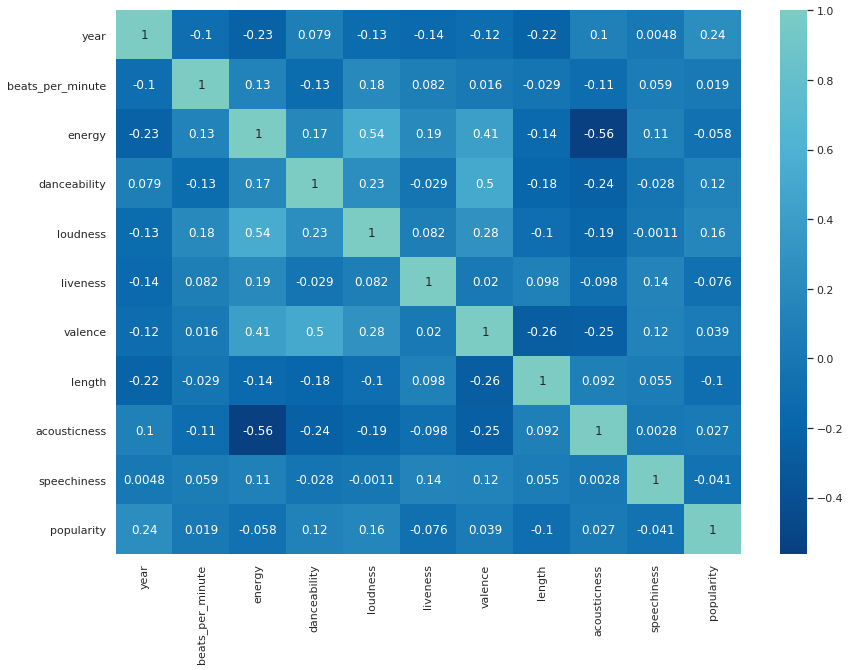

In [42]:
correlations = data.corr()
fig = plt.figure(figsize=(14, 10))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)

* I want to consider 'loudness' as my target variable.
* From the heatmap, it is clear that 'loudness' is highly correlated with 'energy'.

#### Encoding the features

In [43]:
le = LabelEncoder()
for column in data.columns.values:
  if data[column].dtypes == 'object':
    le.fit(data[column].values)
    data[column] = le.transform(data[column])

data.head()

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,202,174,46,2010,97,89,67,-4,8,80,217,19,4,83
1,298,49,27,2010,87,93,75,-5,52,64,263,24,23,82
2,502,89,25,2010,120,84,76,-3,29,71,200,10,14,80
3,41,94,25,2010,119,92,70,-4,8,71,295,0,4,79
4,252,19,48,2010,109,84,64,-5,9,43,221,2,4,78


In [44]:
X = data.drop('loudness', axis=1)
y = data.loudness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### Applying Linear Regression

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(mean_squared_error(y_test, y_pred))

13.48340677273952


#### Applying Support Vector Regression

In [46]:
svr = SVR(C=0.5)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print(mean_squared_error(y_test, y_pred))

17.7378635585233


#### Thanks for reading this notebook!!! I'll try to update the modeling part soon!

Feel free to share your thoughts and suggestions in the comments.